<a href="https://colab.research.google.com/github/Rakeshboin/Dap-python/blob/main/ASSI__6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Simulate a dataset of 2000 patient systolic blood pressure readings, analyze the data by plotting a histogram, calculating descriptive statistics, and demonstrating the Central Limit Theorem by simulating random samples of varying sizes, plotting the distribution of sample means, and explaining the relationship between sample size and the accuracy of estimating the population mean. Allow for custom sample sizes and visualize the decrease in standard error with increasing sample size.

## Data preparation & loading

### Subtask:
Create a Python list/array of 2,000 patient blood pressure values, simulate values, and convert the list into a Pandas DataFrame.


**Reasoning**:
The first steps of the subtask are to import the necessary libraries, generate the simulated blood pressure data using numpy, and then convert it into a pandas DataFrame.



In [1]:
import numpy as np
import pandas as pd

# Generate 2000 random systolic blood pressure values
systolic_bp_values = np.random.normal(loc=120, scale=15, size=2000)

# Create a Pandas DataFrame
df = pd.DataFrame({'Systolic_BP': systolic_bp_values})

# Display the first few rows of the DataFrame
display(df.head())

,Systolic_BP
0,119.309473
1,102.723430
2,101.943729
3,138.537098
4,109.420472


## Data exploration & visualization

### Subtask:
Plot a histogram of the full dataset to visualize the blood pressure distribution. Take random samples of different sizes (e.g., 25, 50, 100 patients), repeat the sampling process, and plot histograms of the sample means for each sample size.


**Reasoning**:
Plot a histogram of the full dataset and then plot histograms of sample means for different sample sizes to visualize the Central Limit Theorem.



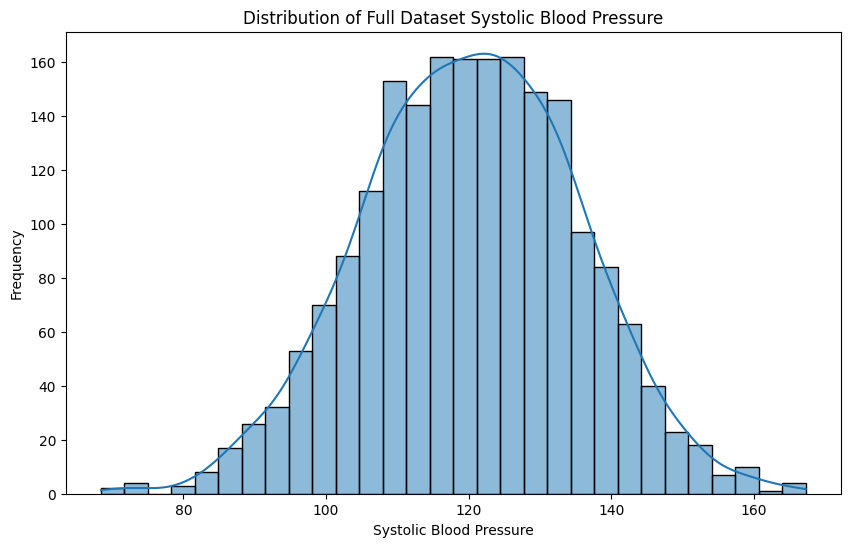

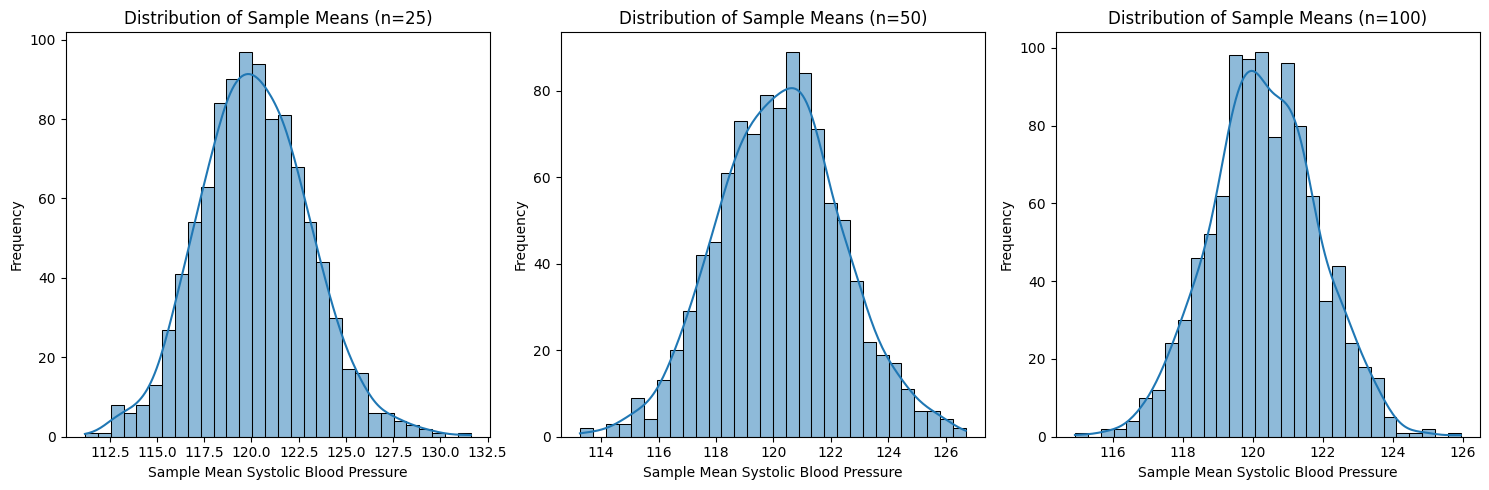

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of the full dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['Systolic_BP'], kde=True, bins=30)
plt.title('Distribution of Full Dataset Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

# Define sample sizes
sample_sizes = [25, 50, 100]
n_iterations = 1000

# Simulate sampling and plot histograms of sample means
plt.figure(figsize=(15, 5))
for i, sample_size in enumerate(sample_sizes):
    sample_means = []
    for _ in range(n_iterations):
        sample = df['Systolic_BP'].sample(sample_size, replace=True)
        sample_means.append(sample.mean())

    plt.subplot(1, len(sample_sizes), i + 1)
    sns.histplot(sample_means, kde=True, bins=30)
    plt.title(f'Distribution of Sample Means (n={sample_size})')
    plt.xlabel('Sample Mean Systolic Blood Pressure')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Statistical insight

### Subtask:
Compute and display the mean, median, variance, and standard deviation of the full dataset. Compare how the distribution of sample means narrows as the sample size increases. Explain the relationship between sample size and accuracy of estimating the true population mean.


**Reasoning**:
Calculate and print the descriptive statistics of the full dataset as requested in steps 1-5.



In [3]:
# Calculate descriptive statistics
mean_bp = df['Systolic_BP'].mean()
median_bp = df['Systolic_BP'].median()
variance_bp = df['Systolic_BP'].var()
std_bp = df['Systolic_BP'].std()

# Print the statistics
print(f"Mean of the full dataset: {mean_bp:.2f}")
print(f"Median of the full dataset: {median_bp:.2f}")
print(f"Variance of the full dataset: {variance_bp:.2f}")
print(f"Standard deviation of the full dataset: {std_bp:.2f}")

# Based on the previously generated histograms of sample means for different sample sizes,
# the spread of these distributions noticeably decreases as the sample size increases.
# The histogram for n=25 is wider than the histogram for n=50, which is wider than
# the histogram for n=100. The distributions become more centered around the true population mean.

# This narrowing of the distribution of sample means with increasing sample size indicates
# that the sample mean is a more accurate estimate of the true population mean when
# the sample size is larger. A smaller spread means that most sample means are closer
# to the true population mean. Therefore, larger sample sizes lead to more precise
# and reliable estimates of the population mean. This is a core concept of the Central Limit Theorem.

Mean of the full dataset: 120.24
Median of the full dataset: 120.46
Variance of the full dataset: 226.38
Standard deviation of the full dataset: 15.05


## Adaptation

### Subtask:
Allow the user to set a custom sample size (e.g., 40, 75, 150). Create a line plot to show how the standard error decreases as sample size increases.


**Reasoning**:
The goal is to show how standard error decreases with increasing sample size. I need to define sample sizes, calculate the standard error for each, and then plot the results. I can group steps 1 through 8 into a single code block.



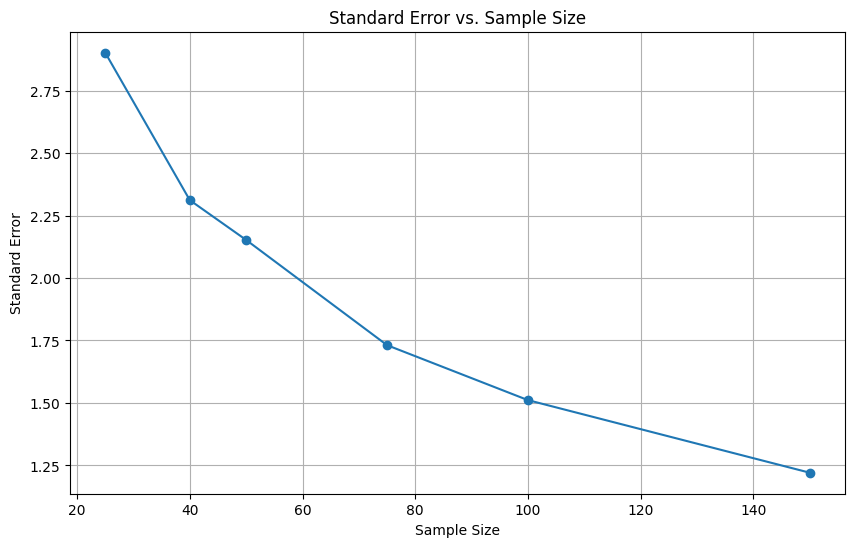

In [4]:
import matplotlib.pyplot as plt

# 1. Define a list of sample sizes
sample_sizes = [25, 50, 100, 40, 75, 150]
n_iterations = 1000

# 2. Initialize an empty list to store the standard errors
standard_errors = []

# 3. Iterate through each sample size
for sample_size in sample_sizes:
    # a. Initialize an empty list to store sample means
    sample_means = []
    # b. Repeat the sampling process a large number of times
    for _ in range(n_iterations):
        sample = df['Systolic_BP'].sample(sample_size, replace=True)
        sample_means.append(sample.mean())
    # c. Calculate the standard deviation of the list of sample means (Standard Error)
    std_error = np.std(sample_means)
    # d. Append the calculated standard error
    standard_errors.append(std_error)

# 4. Sort the list of sample sizes and their corresponding standard errors
# Combine into a list of tuples and sort by sample size
sorted_data = sorted(zip(sample_sizes, standard_errors))
sorted_sample_sizes, sorted_standard_errors = zip(*sorted_data)

# 5. Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_sample_sizes, sorted_standard_errors, marker='o')

# 6. Add a title
plt.title('Standard Error vs. Sample Size')

# 7. Add labels to the x and y axes
plt.xlabel('Sample Size')
plt.ylabel('Standard Error')

# 8. Display the plot
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The simulated dataset of 2000 systolic blood pressure readings had a mean of approximately 120.24, a median of 120.46, a variance of 226.38, and a standard deviation of 15.05.
*   Histograms of sample means for different sample sizes (25, 50, 100) showed that as the sample size increased, the distribution of sample means became narrower and more centered around the population mean, illustrating the Central Limit Theorem.
*   A line plot demonstrated that the standard error, which measures the variability of sample means, decreases as the sample size increases. This confirms that larger sample sizes lead to more precise estimates of the population mean.

### Insights or Next Steps

*   The simulation effectively demonstrates how increasing sample size improves the accuracy and reliability of estimating population parameters like the mean, as evidenced by the decreasing standard error.
*   Future analysis could explore the impact of different population distributions (e.g., skewed data) on the application of the Central Limit Theorem and the behavior of sample means.
